# Importing Header, SoilPrep, and PlotFunctions

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [2]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


## Loading  Mtree 

In [3]:
with open ('HMtree.pickle', 'rb') as file:
    HMtree = pickle.load(file)
 

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

In [7]:
feature_scores = {}

model_details ={}

In [5]:
#HMtree['svr']['Sand']['none']['log'][100]

##  Sand 

#### PLSR

Sand -> [ r2 - **0.57**, Spec - log, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for sand using plsr method we trained the model on the
 logarithmic of reflectance inverse which is resampled to 7 bands.


In [9]:
sand_model_plsr = PLSRegression(n_components=5, scale=True)  
sand_model_plsr.fit(sampled_log[7],  T[0])

PLSRegression(n_components=5)

In [10]:
feature_scores['Sand'] = permutation_importance(sand_model_plsr, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'plsr', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}

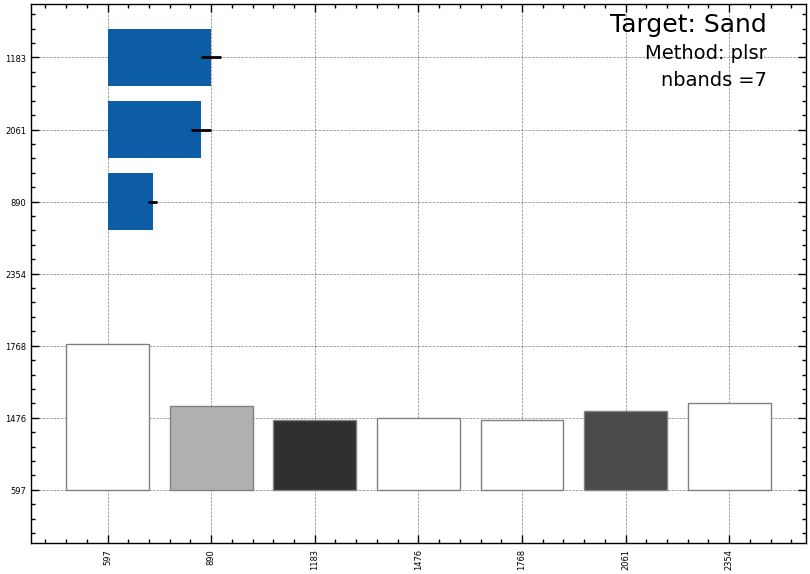

In [12]:
show_important_features_for ('Sand', model_details, feature_scores, 0.005, 1, 2)

### Cubist

Sand -> [ r2 - **0.59**, Spec - log, n_bands -7]     <br/><br/>
***Description***: To obtain the best model for sand using cubist method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 7 bands.

In [25]:
sand_model_cubist = Cubist( n_committees = 10, n_rules = 10 ) 
sand_model_cubist.fit(sampled_log[7],  T[0])

Cubist(n_committees=10, n_rules=10)

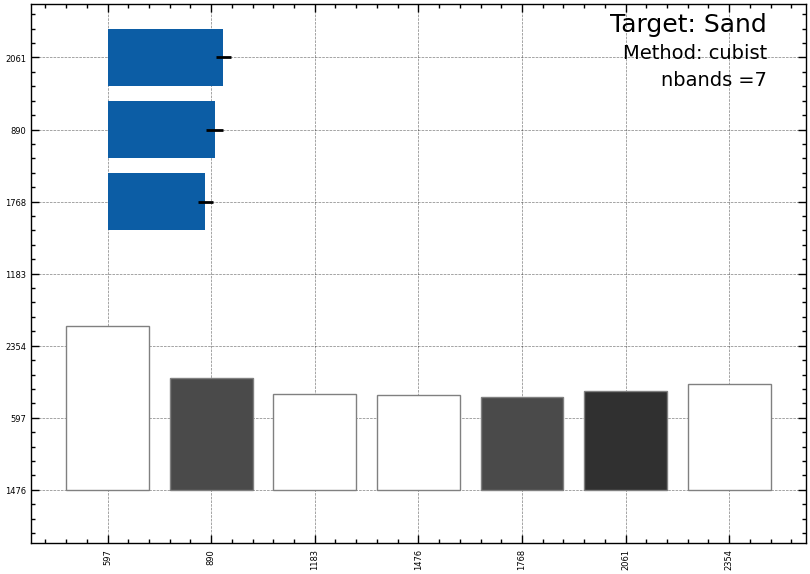

In [26]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'cubist', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('Sand', model_details, feature_scores, 0.2, 1.5, 20)

### Gradient Boosting Regression Tree

Sand -> [ r2 - **0.59**, Spec - fod2, n_bands -39]     <br/><br/>
***Description***: To obtain the best model for sand using gbrt method we trained the model on the first order derivative of the  smoothed spectra which is  resampled to 39 bands.

In [29]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42) 
sand_model_gbrt.fit(fod_sampled[39],  T[0])

GradientBoostingRegressor(n_estimators=50, random_state=42)

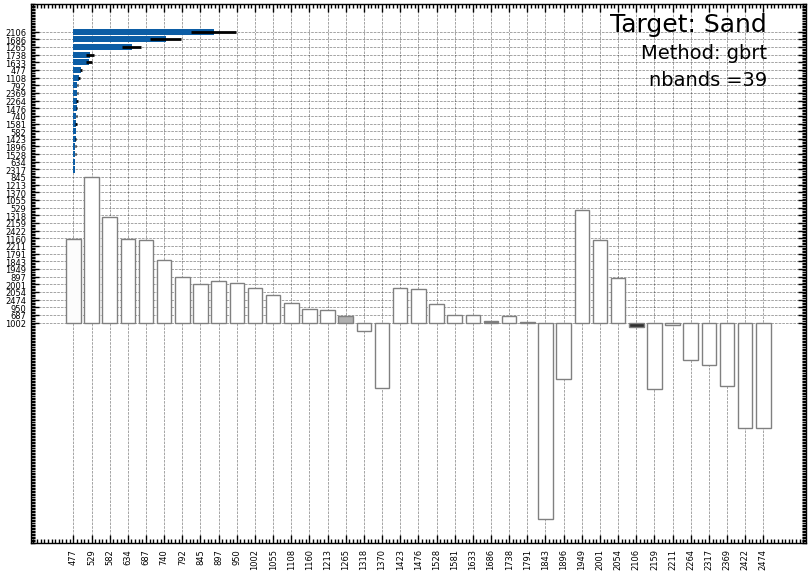

In [30]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled[39], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled[39], 'spec_proc': 'fod2', 'n_bands': 39}
show_important_features_for ('Sand', model_details, feature_scores, 20, 400, 20)

##  Silt 

### PLSR

Silt -> [ r2 - **0.35**, Spec - fod2, n_bands - 29]   <br/><br/>
***Description***:To obtain the best model for silt using plsr method we trained the model on the
 first order derivative of the smoothed spectra which is resampled to 29 bands.


In [33]:
silt_model_plsr = PLSRegression(n_components=2, scale=True)  
silt_model_plsr.fit(fod_sampled[29],  T[1])

PLSRegression()

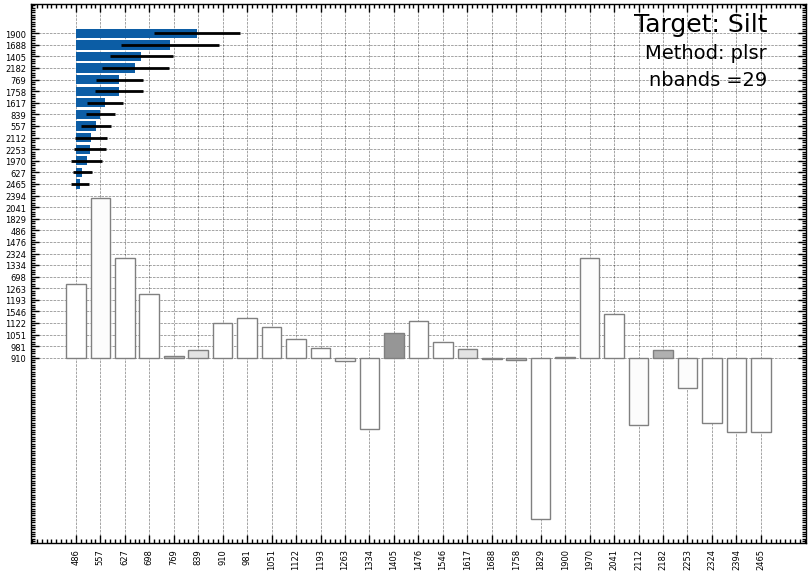

In [34]:
feature_scores['Silt'] = permutation_importance(silt_model_plsr, fod_sampled[29], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'plsr', 'spec': fod_sampled[29], 'spec_proc': 'fod2', 'n_bands': 29}
show_important_features_for ('Silt', model_details, feature_scores, 80, 140, 2)

### Cubist

Silt -> [ r2 - **0.42**, Spec - fod2, n_bands - 37]   <br/><br/>
***Description***:To obtain the best model for silt using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 37 bands.


In [47]:
silt_model_cubist = Cubist(n_committees = 10, n_rules = 10) 
silt_model_cubist.fit(fod_sampled[37],  T[1])

Cubist(n_committees=10, n_rules=10)

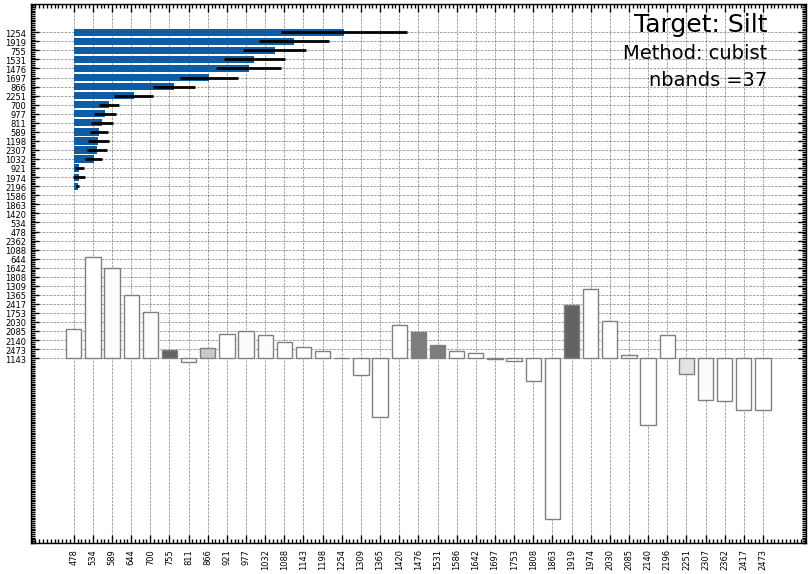

In [48]:
feature_scores['Silt'] = permutation_importance(silt_model_cubist, fod_sampled[37], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'cubist', 'spec': fod_sampled[37], 'spec_proc': 'fod2', 'n_bands': 37}
show_important_features_for ('Silt', model_details, feature_scores, 40, 150, 2)

### Gradient Boosting Regression Tree

Silt -> [ r2 - **0.42**, Spec - fod2, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for silt using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 70 bands.


In [51]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)  
silt_model_gbrt.fit(fod_sampled[70],  T[1])

GradientBoostingRegressor(n_estimators=50, random_state=42)

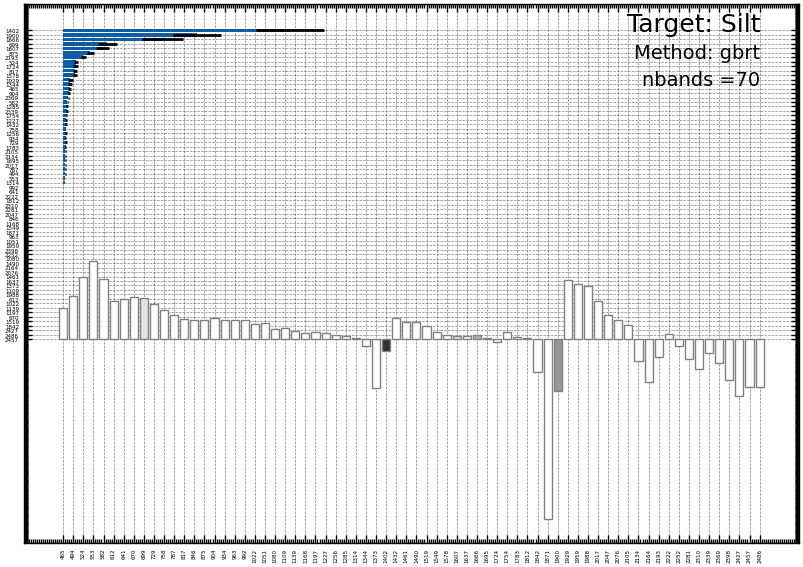

In [52]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled[70], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled[70], 'spec_proc': 'fod2', 'n_bands': 70}
show_important_features_for ('Silt', model_details, feature_scores, 80, 600, 20)

## Clay 

### PLSR

Clay -> [ r2 - **0.66**, Spec - log, n_bands - 15]   <br/><br/>
***Description***:To obtain the best model for clay using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 15 bands.


In [55]:
clay_model_plsr = PLSRegression(n_components=10, scale=True)  
clay_model_plsr.fit(sampled_log[15],  T[2])

PLSRegression(n_components=10)

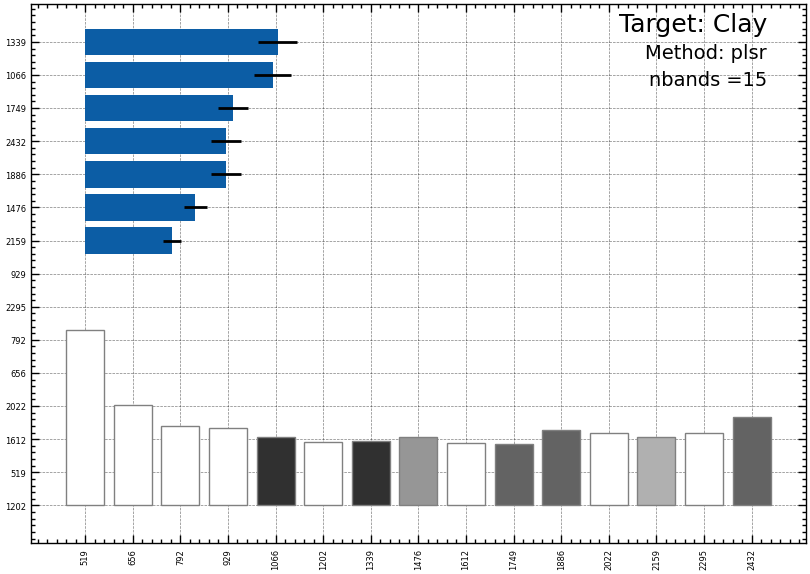

In [56]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log[15], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log[15], 'spec_proc': 'log', 'n_bands': 15}
show_important_features_for ('Clay', model_details, feature_scores, 0.007, 2, 2)

### Cubist

Clay -> [ r2 - **0.67**, Spec - log, n_bands - 21]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 21 bands.


In [81]:
clay_model_cubist = Cubist( n_committees = 10, n_rules = 10)
clay_model_cubist.fit(sampled_log[21],  T[2])

Cubist(n_committees=10, n_rules=10)

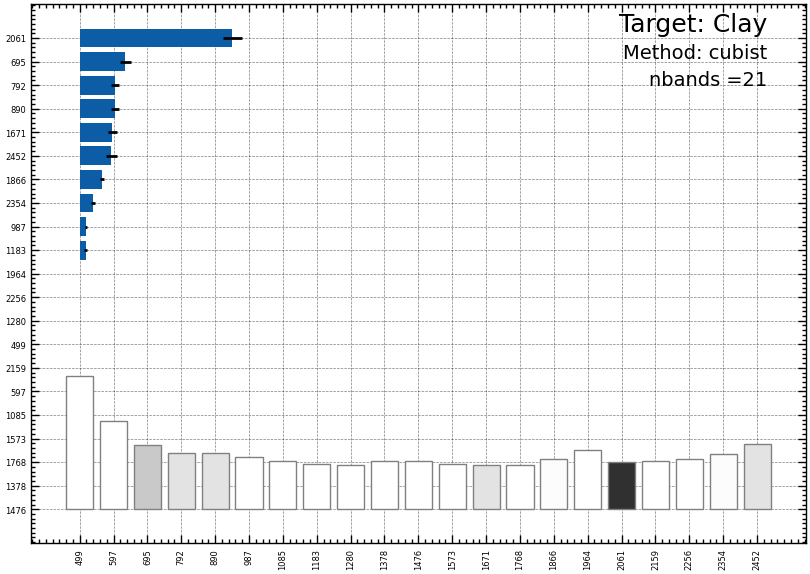

In [83]:
feature_scores['Clay'] = permutation_importance(clay_model_cubist, sampled_log[21], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'cubist', 'spec': sampled_log[21], 'spec_proc': 'log', 'n_bands': 21}
show_important_features_for ('Clay', model_details, feature_scores, 1, 2, 2)

### Gradient Boosting Regression Tree

Clay -> [ r2 - **0.63**, Spec - fod2, n_bands - 90]   <br/><br/>
***Description***:To obtain the best model for clay using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 90 bands.


In [89]:
clay_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)
clay_model_gbrt.fit(fod_sampled[90],  T[2])

GradientBoostingRegressor(n_estimators=50, random_state=42)

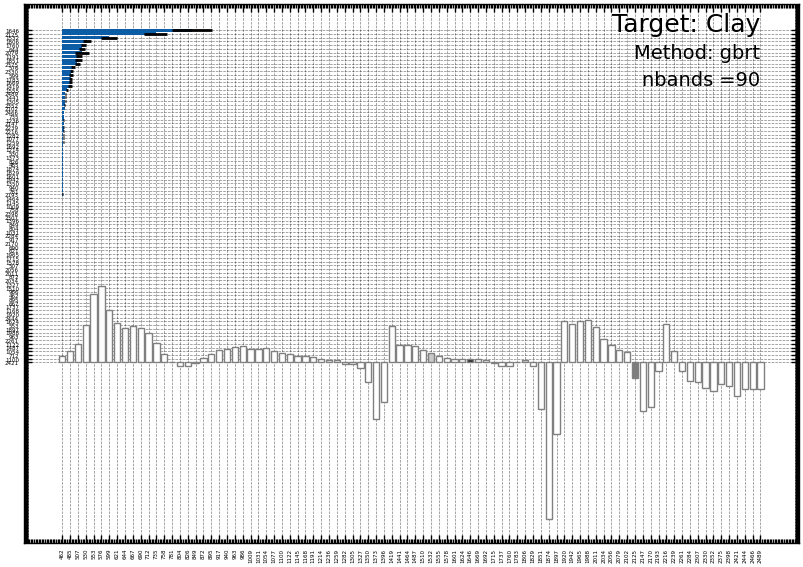

In [92]:
feature_scores['Clay'] = permutation_importance(clay_model_gbrt, fod_sampled[90], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'gbrt', 'spec': fod_sampled[90], 'spec_proc': 'fod2', 'n_bands': 90}
show_important_features_for ('Clay', model_details, feature_scores, 100, 500, 2)

## TOC

### SVR

TOC -> [ r2 - **0.45**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


In [ ]:
TOC_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
TOC_model_svr.fit(sampled_log[100],  T[3])

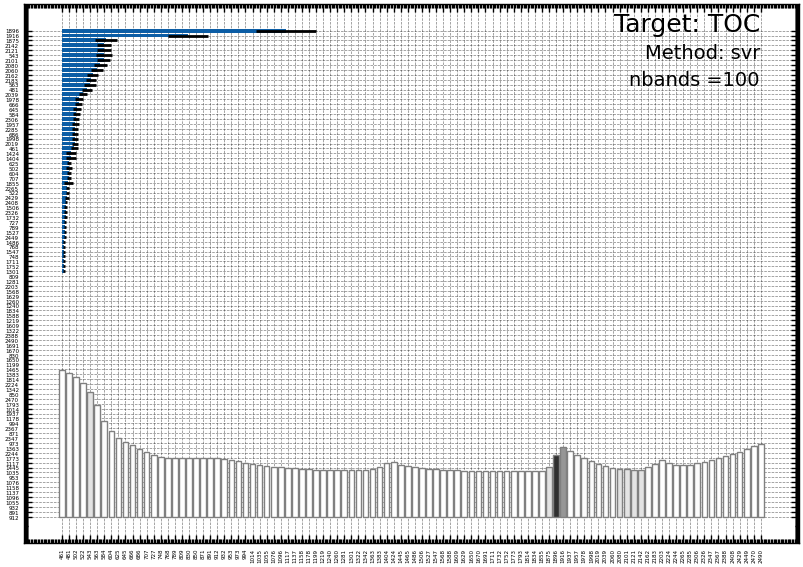

In [107]:
feature_scores['TOC'] = permutation_importance(TOC_model_svr, sampled_log[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('TOC', model_details, feature_scores, 15, 10, 2)

### Cubist

TOC -> [ r2 - **0.5**, Spec - log, n_bands - 39]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 39 bands.


In [119]:
TOC_model_cubist = Cubist(n_committees = 5, n_rules = 10)
TOC_model_cubist.fit(sampled_log[39],  T[3])

Cubist(n_committees=5, n_rules=10)

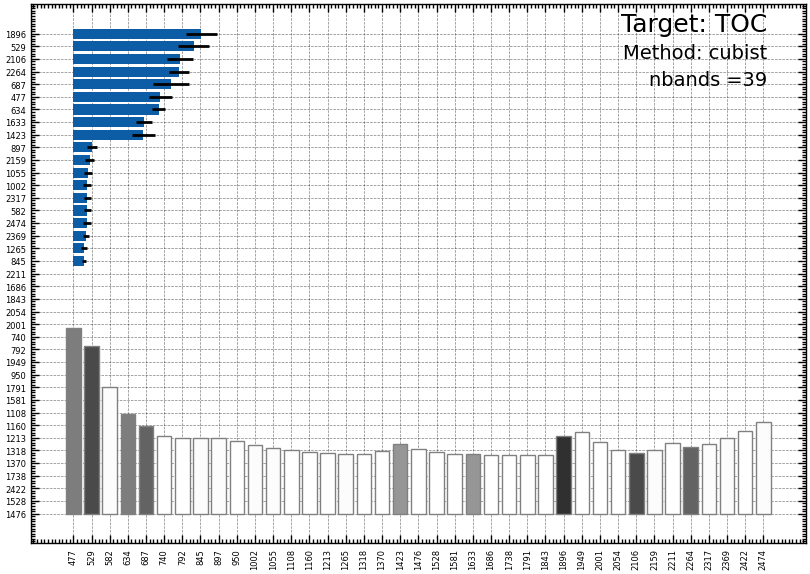

In [121]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, sampled_log[39], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': sampled_log[39], 'spec_proc': 'log', 'n_bands': 39}
show_important_features_for ('TOC', model_details, feature_scores, 10, 5, 2)

### Gradient Boosting Regression Tree

TOC -> [ r2 - **0.54**, Spec - fod2, n_bands - 50]   <br/><br/>
***Description***:To obtain the best model for TOC using gbrt method we trained the model on the first order derivative of the  smoothed spectra which is resampled to 50 bands.


In [131]:
TOC_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42)
TOC_model_gbrt.fit(fod_sampled[50],  T[3])

GradientBoostingRegressor(n_estimators=30, random_state=42)

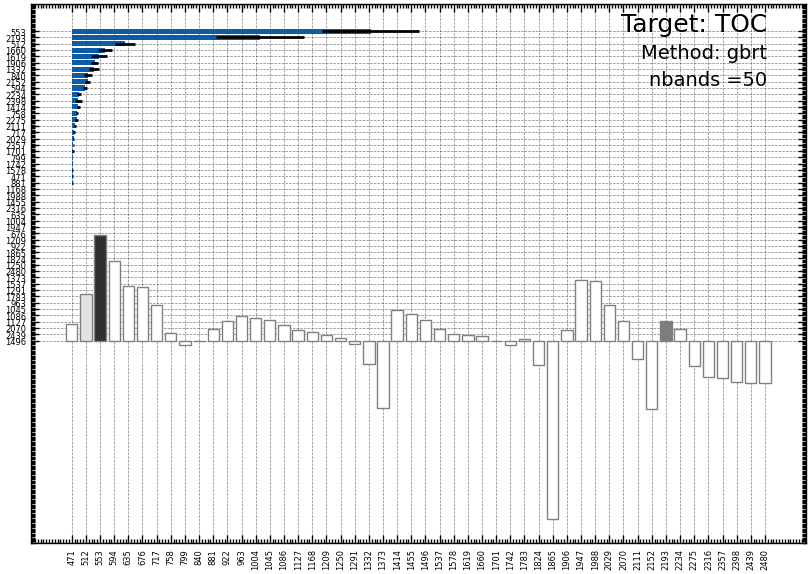

In [133]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, fod_sampled[50], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'gbrt', 'spec': fod_sampled[50], 'spec_proc': 'fod2', 'n_bands': 50}
show_important_features_for ('TOC', model_details, feature_scores, 40, 250, 2)

## CaCO3

### PLSR

TOC -> [ r2 - **0.61**, Spec - none, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using plsr method we trained the model on the smoothed spectra which is resampled to 10 bands.


In [5]:
CaCO3_model_plsr = PLSRegression(n_components=4, scale=True)
CaCO3_model_plsr.fit(sampled_spec[10],  T[4])

PLSRegression(n_components=4)

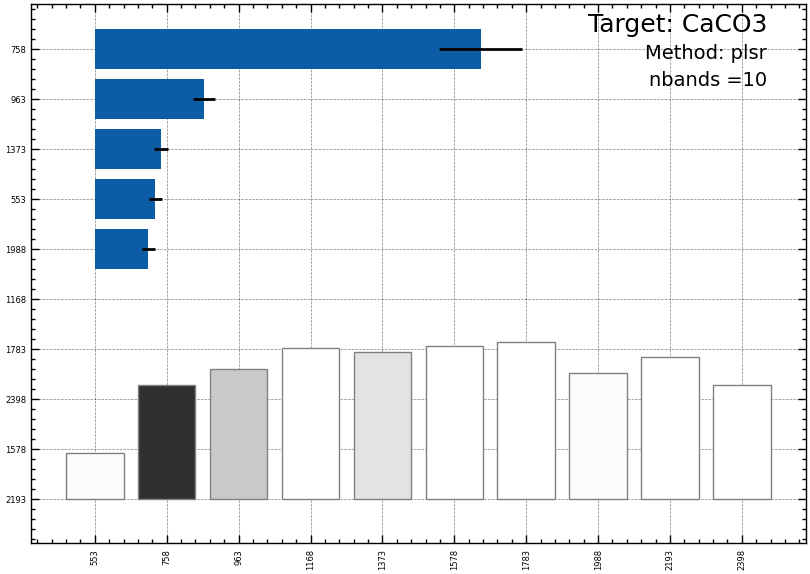

In [9]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_plsr, sampled_spec[10], T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'plsr', 'spec': sampled_spec[10], 'spec_proc': 'none', 'n_bands': 10}
show_important_features_for ('CaCO3', model_details, feature_scores, 0.2, 8, 2)

### Cubist

CaCO3 -> [ r2 - **0.66**, Spec - fod2, n_bands - 27]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 27 bands.


In [49]:
CaCO3_model_cubist =Cubist(n_committees = 10, n_rules = 10)
CaCO3_model_cubist.fit(fod_sampled[27],  T[4])

Cubist(n_committees=10, n_rules=10)

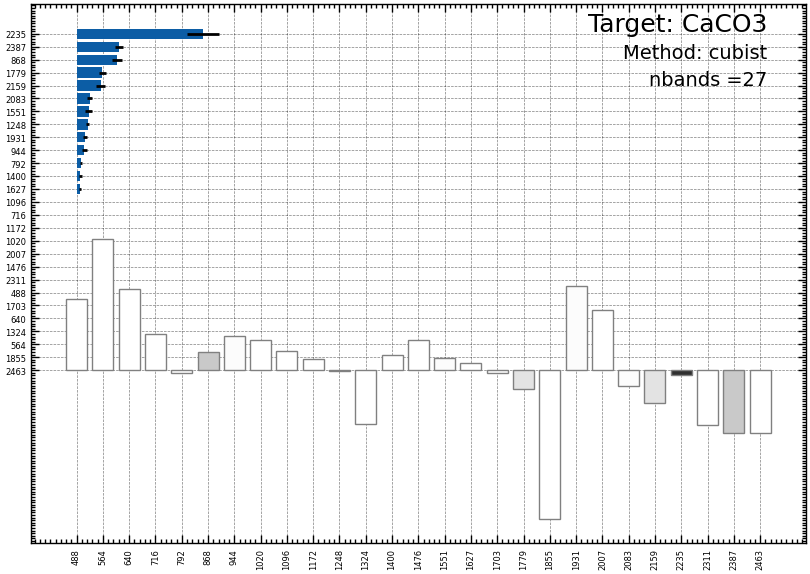

In [53]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_sampled[27], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_sampled[27], 'spec_proc': 'fod2', 'n_bands': 27}
show_important_features_for ('CaCO3', model_details, feature_scores, 8, 100, 2)

### Gradient Boosting Regression Tree

CaCO3 -> [ r2 - **0.66**, Spec - fod2, n_bands - 27]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 27 bands.


In [64]:
CaCO3_model_gbrt =GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)
CaCO3_model_gbrt.fit(fod_sampled[27],  T[4])

GradientBoostingRegressor(n_estimators=50, random_state=42)

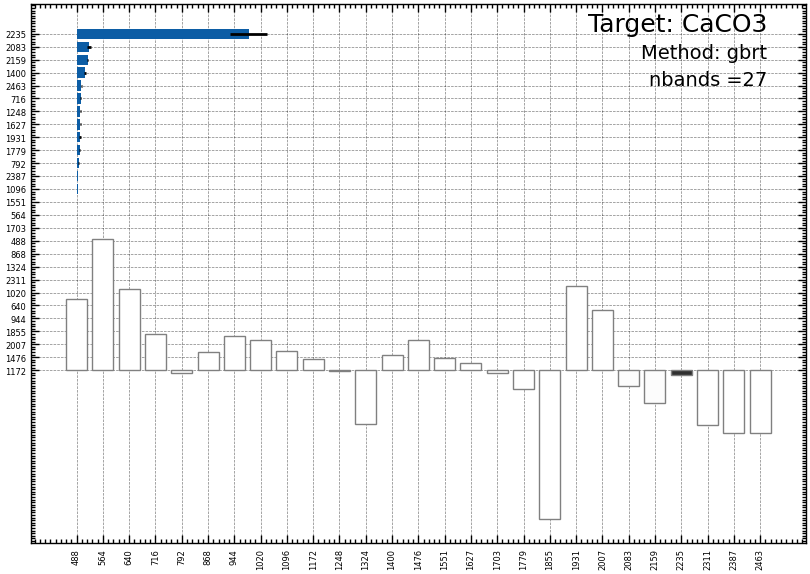

In [65]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, fod_sampled[27], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'gbrt', 'spec': fod_sampled[27], 'spec_proc': 'fod2', 'n_bands': 27}
show_important_features_for ('CaCO3', model_details, feature_scores, 8, 100, 2)